In [ ]:
import spacy
from spacy.tokens import DocBin
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
ru_stopwords = set(stopwords.words("russian"))
en_stopwords = set(stopwords.words("english"))

ru_stopwords.add('это')
ru_stopwords.add('всё')
ru_stopwords.add('свой')
ru_stopwords.add('ещё')
ru_stopwords.add('весь')

en_stopwords.add("'s")

from string import punctuation
punct_list = [c for c in punctuation]
punct_list.append('--')
punct_list.append('...')
punct_list.append('–')

In [ ]:
with open("corpora/subtitles/facebook/facebook5_spacy.bin", "rb") as file:
    en_translated_bytes_data = file.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(en_translated_bytes_data)
en_translated_docs = list(doc_bin.get_docs(nlp.vocab))

In [ ]:
with open("corpora/subtitles/en_subtitles_spacy_dump.bin", "rb") as file:
    en_bytes_data = file.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(en_bytes_data)
en_docs = list(doc_bin.get_docs(nlp.vocab))

with open("corpora/subtitles/ru_subtitles_spacy_dump.bin", "rb") as file:
    ru_bytes_data = file.read()

nlp = spacy.blank("ru")
doc_bin = DocBin().from_bytes(ru_bytes_data)
ru_docs = list(doc_bin.get_docs(nlp.vocab))
ru_docs[5]

Да , думаю у Донни немножко есть . 

In [ ]:
print(en_translated_docs[634911])

My friend ran to the pharmacy.


In [ ]:
pos_dict = defaultdict(int)

total_tokens = 0
for sentence in ru_docs:
    for token in sentence:
        pos_dict[token.pos_] += 1
        total_tokens += 1

In [ ]:
for key, value in pos_dict.items():
    print(f"{key}: {value/total_tokens}")

NOUN: 0.13889743192979911
VERB: 0.13726289316090873
ADP: 0.0544986975697171
ADV: 0.06392422212134656
PRON: 0.1311960143129287
DET: 0.025649882855112095
PUNCT: 0.2426709804921177
SCONJ: 0.02139619755848095
PROPN: 0.035496923542173764
ADJ: 0.045801275527729855
PART: 0.051485322699013084
CCONJ: 0.024092873520118806
AUX: 0.011365526079745844
NUM: 0.008672381479486322
INTJ: 0.004787562930464926
X: 0.002213682034937363
SYM: 0.0005881321859191139


([<matplotlib.patches.Wedge at 0x190c3eb0ee0>,
 [Text(0.9969260857347115, 0.464906850435296, 'NOUN'),
  Text(0.2900678089179486, 1.061065816162947, 'VERB'),
  Text(-0.3622515816849611, 1.0386403571818035, 'ADP'),
  Text(-0.7150293019465378, 0.8359025645120651, 'ADV'),
  Text(-1.0657523309738666, 0.2723453121016959, 'PRON'),
  Text(-1.067799603691741, -0.26420447830375826, 'DET'),
  Text(-0.5131056678783028, -0.9729966976260305, 'PUNCT'),
  Text(0.3712992778125526, -1.0354404117552478, 'SCONJ'),
  Text(0.5494698983357128, -0.9529338019101545, 'PROPN'),
  Text(0.772392935178133, -0.7832044137304823, 'ADJ'),
  Text(0.9722624152944236, -0.5144956713188694, 'PART'),
  Text(1.066000054042995, -0.2713740679953258, 'CCONJ'),
  Text(1.0895603372852636, -0.15118952151132273, 'AUX'),
  Text(1.0969134220221257, -0.08234649104673515, 'NUM'),
  Text(1.099413923514189, -0.03590299128396732, 'INTJ'),
  Text(1.0999376203085862, -0.01171458193384359, 'X'),
  Text(1.099998122379865, -0.002032427310400888

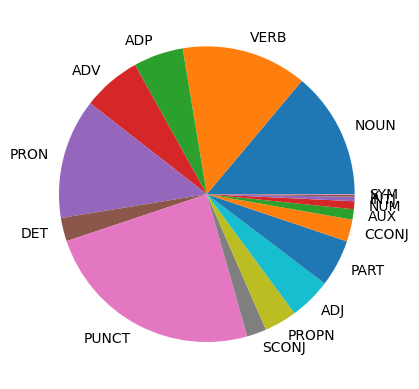

In [ ]:
plt.pie(list(pos_dict.values()), labels=list(pos_dict.keys()))

In [ ]:
with open("corpora/subtitles/numerical_alignment/subtitles_inter.txt", "rt", encoding="utf-8") as file:
    aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/numerical_alignment/subtitles_itermax.txt", "rt", encoding="utf-8") as file:
    aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/numerical_alignment/subtitles_mwmf.txt", "rt", encoding="utf-8") as file:
    aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/facebook/inter", "rt", encoding="utf-8") as file:
    t_aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/facebook/itermax", "rt", encoding="utf-8") as file:
    t_aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/facebook/mwmf", "rt", encoding="utf-8") as file:
    t_aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

In [ ]:
from collections import Counter

def most_common_lemmas(docs, n: int):
    words = []
    for doc in docs:
        for token in doc:
            if not token.is_stop and not token.is_punct:
                words.append(token.lemma_.lower())
    word_freq = Counter(words)
    return word_freq.most_common(n)

def most_common_lemmas_tagged(docs, tag, n: int):
    words = []
    for doc in docs:
        for token in doc:
            if not token.is_stop and not token.is_punct:
                if token.pos_ == tag:
                    words.append(token.lemma_.lower())
    word_freq = Counter(words)
    return word_freq.most_common(n)

In [ ]:
most_common_nouns = most_common_lemmas_tagged(ru_docs, "NOUN", 150)

In [ ]:
most_common_adjectives = most_common_lemmas_tagged(ru_docs, "ADJ", 150)

In [ ]:
most_common_verbs = most_common_lemmas_tagged(ru_docs, "VERB", 150)

смотрим первые 150

In [ ]:
def plot_variety_pie(variety_dict, original_word: str):
    variety_dict_items = list(variety_dict.items())
    variety_dict_items.sort(key=lambda x: -len(x[1]))

    translations = []
    # translations.append("other")
    number_of_matches = []
    pre_number_of_matches = [len(x[1]) for x in variety_dict_items]
    total_words = sum(pre_number_of_matches)
    other_matches = 0
    for key, val in variety_dict_items:
        # if len(val) < (total_words / 100):
        #     other_matches += len(val)
        # else:
            translations.append(key)
            number_of_matches.append(len(val))
    # translations.append("_other")
    # number_of_matches.append(other_matches)
    
    # number_of_matches.append(other_len)

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(number_of_matches, autopct = lambda pct: func(pct, number_of_matches), labels = translations)

    plt.title(original_word)
    plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

    # show plot
    plt.show()

In [ ]:
def get_variety_dict_from_alignment(original_word: str, aligned_text: list, t_aligned_text: list):
    variety_dict = defaultdict(lambda : set())
    translation_dict = defaultdict(lambda : set())
    hell = []
    for i, num_sentence_pairs in tqdm(enumerate(aligned_text)):
        if len(num_sentence_pairs) == 0 or len(en_translated_docs[i]) == 0:
            continue
        
        phrase = []
        for src_idx, tgt_idx in num_sentence_pairs:
            # try:
                if ru_docs[i][src_idx].lemma_.lower() == original_word \
                    and en_docs[i][tgt_idx].text.lower() not in en_stopwords \
                        and en_docs[i][tgt_idx].text.lower() not in punct_list:
                    phrase.append(en_docs[i][tgt_idx].lemma_.lower())

            # except:
            #     print("Original:", i, src_idx, tgt_idx)
            #     continue

        if phrase:
            # phrase.sort()
            # phrase = ' '.join(phrase)
            # variety_dict[phrase].add(i)

            translated_phrase = []
            for tsrc_idx, ttgt_idx in t_aligned_text[i]:
                # try:
                    tlemma = en_translated_docs[i][ttgt_idx].lemma_.lower()
                    if ru_docs[i][tsrc_idx].lemma_.lower() == original_word \
                        and tlemma not in en_stopwords \
                            and tlemma not in punct_list:
                        # translation_dict[tlemma].append(i)
                        translated_phrase.append(tlemma)
                # except:
                #     print("Translation:", i, tsrc_idx, ttgt_idx)
                #     continue
            
            if translated_phrase:
                phrase.sort()
                phrase = ' '.join(phrase)
                variety_dict[phrase].add(i)
                translated_phrase.sort()
                translated_phrase = ' '.join(translated_phrase)
                translation_dict[translated_phrase].add(i)
            else:
                hell.append(i)

    return variety_dict, translation_dict, hell

In [ ]:
def distil_dicts(orig, trans):
    sum_all = sum(map(lambda x: len(x), orig.values()))
    blacklist = []
    new_orig = defaultdict(list)
    for key, value in orig.items():
        if len(value) < sum_all / 100:
            blacklist += value
        else:
            new_orig[key] = value

    new_trans = defaultdict(list)
    for key, value in trans.items():
        new = []
        for el in value:
            if el not in blacklist:
                new.append(el)
        new_trans[key] = new
    
    return new_orig, new_trans

In [ ]:
noun_origs, noun_transes = [], []
for word, _ in most_common_nouns:
    orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)
    noun_origs.append(orig)
    noun_transes.append(trans)

In [ ]:
adj_origs, adj_transes = [], []
for word, _ in most_common_adjectives:
    orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)
    adj_origs.append(orig)
    adj_transes.append(trans)

900000it [00:05, 172477.14it/s]
900000it [00:04, 209347.92it/s]
900000it [00:04, 198257.09it/s]
900000it [00:04, 187704.31it/s]
900000it [00:04, 193377.16it/s]
900000it [00:04, 198684.62it/s]
900000it [00:04, 203131.14it/s]
900000it [00:04, 212617.12it/s]
900000it [00:04, 196380.43it/s]
900000it [00:04, 203775.35it/s]
900000it [00:04, 209300.00it/s]
900000it [00:04, 204157.90it/s]
900000it [00:05, 170660.91it/s]
900000it [00:04, 198492.28it/s]
900000it [00:04, 194381.10it/s]
900000it [00:04, 184034.72it/s]
900000it [00:04, 194903.68it/s]
900000it [00:04, 193049.86it/s]
900000it [00:04, 206127.07it/s]
900000it [00:04, 209738.50it/s]
900000it [00:04, 221354.69it/s]
900000it [00:04, 200763.52it/s]
900000it [00:04, 211403.86it/s]
900000it [00:04, 204444.12it/s]
900000it [00:04, 202402.97it/s]
900000it [00:04, 207988.63it/s]
900000it [00:04, 206054.62it/s]
900000it [00:04, 202972.40it/s]
900000it [00:04, 205769.20it/s]
900000it [00:03, 229456.34it/s]
900000it [00:04, 222942.86it/s]
900000it

In [ ]:
verb_origs, verb_transes = [], []
for word, _ in most_common_verbs:
    orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)
    verb_origs.append(orig)
    verb_transes.append(trans)

900000it [00:08, 111589.58it/s]
900000it [00:05, 156840.12it/s]
900000it [00:05, 165164.99it/s]
900000it [00:05, 169621.70it/s]
900000it [00:05, 177653.61it/s]
900000it [00:04, 192440.47it/s]
900000it [00:04, 187664.84it/s]
900000it [00:04, 201727.28it/s]
900000it [00:04, 194605.57it/s]
900000it [00:05, 151532.60it/s]
900000it [00:04, 204056.03it/s]
900000it [00:04, 205459.39it/s]
900000it [00:04, 202902.25it/s]
900000it [00:04, 193830.98it/s]
900000it [00:04, 213236.06it/s]
900000it [00:04, 202571.12it/s]
900000it [00:04, 212841.93it/s]
900000it [00:04, 194560.59it/s]
900000it [00:04, 199440.45it/s]
900000it [00:04, 206929.65it/s]
900000it [00:04, 202838.98it/s]
900000it [00:04, 207997.88it/s]
900000it [00:04, 199348.01it/s]
900000it [00:04, 207458.92it/s]
900000it [00:04, 207839.84it/s]
900000it [00:04, 206814.43it/s]
900000it [00:04, 181343.07it/s]
900000it [00:04, 210947.00it/s]
900000it [00:04, 220186.60it/s]
900000it [00:04, 208470.55it/s]
900000it [00:04, 201863.89it/s]
900000it

In [ ]:
distil_noun_origs, distil_noun_transes = [], []
for orig, trans in zip(noun_origs, noun_transes):
    new_orig, new_trans = distil_dicts(orig, trans)
    distil_noun_origs.append(new_orig)
    distil_noun_transes.append(new_trans)

distil_adj_origs, distil_adj_transes = [], []
for orig, trans in zip(adj_origs, adj_transes):
    new_orig, new_trans = distil_dicts(orig, trans)
    distil_adj_origs.append(new_orig)
    distil_adj_transes.append(new_trans)

distil_verb_origs, distil_verb_transes = [], []
for orig, trans in zip(verb_origs, verb_transes):
    new_orig, new_trans = distil_dicts(orig, trans)
    distil_verb_origs.append(new_orig)
    distil_verb_transes.append(new_trans)

In [ ]:
orig_noun_sums = [0 for _ in range(len(distil_noun_origs))]
for i, dictionary in enumerate(distil_noun_origs):
    for key, value in dictionary.items():
        orig_noun_sums[i] += len(value)
    
orig_adj_sums = [0 for _ in range(len(distil_adj_origs))]
for i, dictionary in enumerate(distil_adj_origs):
    for key, value in dictionary.items():
        orig_adj_sums[i] += len(value)

orig_verb_sums = [0 for _ in range(len(distil_verb_origs))]
for i, dictionary in enumerate(distil_verb_origs):
    for key, value in dictionary.items():
        orig_verb_sums[i] += len(value)

In [ ]:
distil_verb_origs

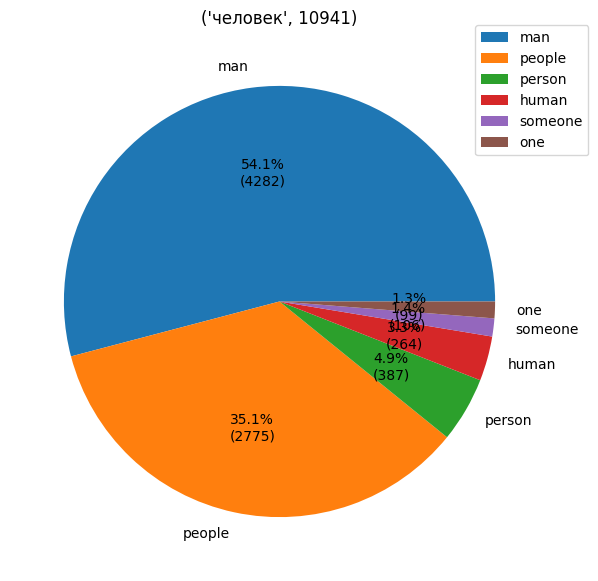

In [ ]:
plot_variety_pie(distil_noun_origs[0], most_common_nouns[0])

In [ ]:
noun_sums[0]

In [ ]:
for i, dictionary in enumerate(distil_adj_origs):
    print(most_common_adjectives[i])
    for key, value in dictionary.items():
        print(f"{key}: {len(value)/orig_adj_sums[i]}")
    print("=================")

('хороший', 8808)
good: 0.3551383781691504
right: 0.16905360944455197
ok: 0.01664408747822721
well: 0.2910779949680666
fine: 0.04219082639829688
nice: 0.046448616218308494
okay: 0.050803173988774916
alright: 0.016257015676407974
yes: 0.0123862976582156
('дорогой', 4635)
expensive: 0.046347793845012975
honey: 0.03596588802373007
darling: 0.328513162773452
dear: 0.5684093437152391
darle: 0.020763811642565813
('добрый', 4434)
good: 0.8531493276716207
kind: 0.06829440905874026
nice: 0.01627742392073602
morning: 0.02300070771408351
hello: 0.024769992922859165
goodnight: 0.014508138711960368
('нужный', 3537)
take: 0.023593466424682397
want: 0.2823956442831216
need: 0.47404718693284936
't: 0.017785843920145192
must: 0.10199637023593466
get: 0.038112522686025406
be: 0.032304900181488204
't need: 0.012704174228675136
ought: 0.01705989110707804
('первый', 3141)
first: 0.9435806308307418
one: 0.04486894713460684
front: 0.011550422034651266
('милый', 2618)
nice: 0.2503267973856209
sweetheart: 0.02

In [ ]:
for i, dictionary in enumerate(distil_noun_origs):
    print(most_common_nouns[i])
    for key, value in dictionary.items():
        print(f"{key}: {len(value)/orig_noun_sums[i]}")
    print("=================")

('человек', 10941)
someone: 0.013515220411772135
people: 0.35063786787924717
human: 0.033472274851585194
man: 0.5409877478842996
person: 0.04888215233042819
one: 0.012504736642667677
('спасибо', 8292)
thank: 0.9578425294482331
much: 0.04215747055176689
('дело', 8209)
business: 0.272887323943662
matter: 0.2140845070422535
thing: 0.09190140845070423
actually: 0.02640845070422535
deal: 0.02992957746478873
case: 0.1288732394366197
really: 0.05985915492957746
fact: 0.032746478873239435
work: 0.02852112676056338
affair: 0.036619718309859155
something: 0.014788732394366197
happen: 0.015492957746478873
job: 0.02852112676056338
wrong: 0.01936619718309859
('время', 7552)
time: 0.8944685189905685
long: 0.027020137649757837
lately: 0.023706347183278104
day: 0.036196788172317106
hour: 0.018608208004078513
('мистер', 6779)
mr.: 0.752
mr: 0.18933333333333333
mister: 0.04533333333333334
mr. mr.: 0.013333333333333334
('день', 6667)
day: 0.8885522614152781
afternoon: 0.06448820601601385
birthday: 0.0123

In [ ]:
for i, dictionary in enumerate(distil_verb_origs):
    print(most_common_verbs[i])
    for key, value in dictionary.items():
        print(f"{key}: {len(value)/orig_verb_sums[i]}")
    print("=================")

('знать', 27172)
someone: 0.013515220411772135
people: 0.35063786787924717
human: 0.033472274851585194
man: 0.5409877478842996
person: 0.04888215233042819
one: 0.012504736642667677
('сказать', 18957)
thank: 0.9578425294482331
much: 0.04215747055176689
('говорить', 14248)
business: 0.272887323943662
matter: 0.2140845070422535
thing: 0.09190140845070423
actually: 0.02640845070422535
deal: 0.02992957746478873
case: 0.1288732394366197
really: 0.05985915492957746
fact: 0.032746478873239435
work: 0.02852112676056338
affair: 0.036619718309859155
something: 0.014788732394366197
happen: 0.015492957746478873
job: 0.02852112676056338
wrong: 0.01936619718309859
('думать', 13659)
time: 0.8944685189905685
long: 0.027020137649757837
lately: 0.023706347183278104
day: 0.036196788172317106
hour: 0.018608208004078513
('видеть', 10555)
mr.: 0.752
mr: 0.18933333333333333
mister: 0.04533333333333334
mr. mr.: 0.013333333333333334
('сделать', 9162)
day: 0.8885522614152781
afternoon: 0.06448820601601385
birthd

In [ ]:
def stable(vardict, total):
    for key, value in vardict.items():
        if len(value) / total > 0.9:
            return True

In [ ]:
cnt = 0
for i, dictionary in enumerate(distil_noun_origs):
    if stable(dictionary, orig_noun_sums[i]):
        cnt += 1
print(cnt)

In [ ]:
cnt = 0
for i, dictionary in enumerate(distil_adj_origs):
    if stable(dictionary, orig_adj_sums[i]):
        cnt += 1
print(cnt)